In [1]:
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set figure size
plt.rcParams["figure.figsize"] = (8,6)

# specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)


### Datetime objects in Python, Numpy and Pandas

##### Native Python dates and times

In [2]:
# Python: datetime module

from datetime import datetime
d = datetime(year=2021, month=4, day=14)
d

datetime.datetime(2021, 4, 14, 0, 0)

In [3]:
# Once you have a datetime object, you can do things like printing the day of the week:

d.strftime('%A')

'Wednesday'

Python documentation: https://docs.python.org/3/library/datetime.html
    

#### Numpy native time series dtype

In [4]:
import numpy as np
date = np.array('2015-07-14', dtype=np.datetime64)
date

array('2015-07-14', dtype='datetime64[D]')

In [5]:
# Now can quickly do vectorized operations on it!

date + np.arange(5)

array(['2015-07-14', '2015-07-15', '2015-07-16', '2015-07-17',
       '2015-07-18'], dtype='datetime64[D]')

##### Pandas time series data type:

- Timestamp
- 'DatetimeIndex' - Datetime object as Index

In [6]:
t = pd.Timestamp('2021-04-14, 07:50')
t

Timestamp('2021-04-14 07:50:00')

In [7]:
# We can use various attributes of datetime object to figure out day, month, year, weekday etc
t.quarter

2

In [8]:
t.month

4

## Demo: Working with Timeseries data in pandas

In [9]:
# We will use Ethererum price data from 2017-2020 to demo Pandas capability for time-series data

sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df.head(10)

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
5,2020-03-13 08-PM,ETHUSD,124.85,1940673.93
6,2020-03-13 08-AM,ETHUSD,128.39,6808571.23
7,2020-03-13 07-PM,ETHUSD,134.03,7579741.09
8,2020-03-13 07-AM,ETHUSD,131.35,5255468.75
9,2020-03-13 06-PM,ETHUSD,128.93,4898735.81


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23674 entries, 0 to 23673
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    23674 non-null  object 
 1   Symbol  23674 non-null  object 
 2   Close   23674 non-null  float64
 3   Volume  23674 non-null  float64
dtypes: float64(2), object(2)
memory usage: 739.9+ KB


In [11]:
# check for nulls
df.isnull().sum()

Date      0
Symbol    0
Close     0
Volume    0
dtype: int64

In [12]:
plt.plot(df.Date, df.Close);

Error in callback <function flush_figures at 0x7ff69abe1ee0> (for post_execute):


KeyboardInterrupt: 

<AxesSubplot:>

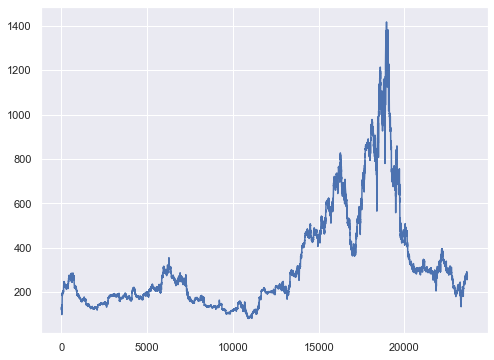

In [13]:
# use pandas .plot()
df.Close.plot()

### Time series analysis: How to make pandas time-aware and leverage inbuild functionality:

1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
2. Set the datetime column as Index
3. Sort the datetime index

In [14]:
# pandas to_datetime method can convert strings/object to datetime object (aka Timestamp object).
# Most of time pandas is smart enough to parse the date without any help.

pd.to_datetime('Jan 1 1970')

Timestamp('1970-01-01 00:00:00')

In [15]:
pd.to_datetime('2020-03-13 08-PM')

ParserError: Unknown string format: 2020-03-13 08-PM

In [16]:
# Sometimes we have to specify the format of the datatime string to help pandas parse the date/time)

pd.to_datetime('2020-03-13 08-PM', format='%Y-%m-%d %I-%p')

Timestamp('2020-03-13 20:00:00')

In [17]:
df.head(2)

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70


Documentation on strftime() Format Codes:  
https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [18]:
# Step 1: Lets convert the 'Date' column in our df to pandas datetime object using pd.to_datetime()

df.Date = pd.to_datetime(df.Date, format='%Y-%m-%d %I-%p')

In [19]:
# confirm if the 'Date' column is indeed a datetime object now

df.Date

0       2020-03-13 12:00:00
1       2020-03-13 00:00:00
2       2020-03-13 11:00:00
3       2020-03-13 10:00:00
4       2020-03-13 09:00:00
                ...        
23669   2017-07-01 17:00:00
23670   2017-07-01 16:00:00
23671   2017-07-01 15:00:00
23672   2017-07-01 14:00:00
23673   2017-07-01 13:00:00
Name: Date, Length: 23674, dtype: datetime64[ns]

In [20]:
# Step 2 and 3 combined: Set 'Date' column as Index and sort the index:

df = df.set_index('Date').sort_index()

In [21]:
df.head(5)

,Symbol,Close,Volume
Date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


In [22]:
# What is the Index type now?

type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

<AxesSubplot:xlabel='Date'>

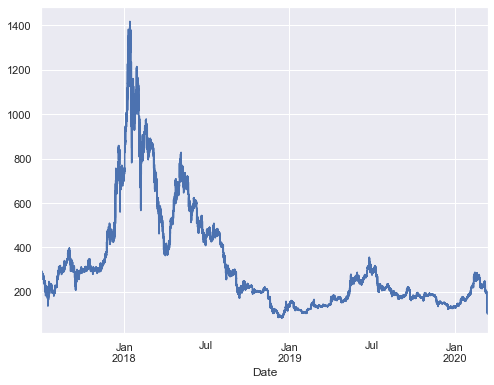

In [23]:
# lets plot the closing price again and how it compares to previous plot

df.Close.plot()

#### Pandas *datetimeIndex* attributes

https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [24]:
df.index

DatetimeIndex(['2017-07-01 11:00:00', '2017-07-01 12:00:00',
               '2017-07-01 13:00:00', '2017-07-01 14:00:00',
               '2017-07-01 15:00:00', '2017-07-01 16:00:00',
               '2017-07-01 17:00:00', '2017-07-01 18:00:00',
               '2017-07-01 19:00:00', '2017-07-01 20:00:00',
               ...
               '2020-03-13 11:00:00', '2020-03-13 12:00:00',
               '2020-03-13 13:00:00', '2020-03-13 14:00:00',
               '2020-03-13 15:00:00', '2020-03-13 16:00:00',
               '2020-03-13 17:00:00', '2020-03-13 18:00:00',
               '2020-03-13 19:00:00', '2020-03-13 20:00:00'],
              dtype='datetime64[ns]', name='Date', length=23674, freq=None)

In [25]:
# add a new columns called 'day' which is the 'weekday'

df['day'] = df.index.day_name()

In [26]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [27]:
# Can I use groupby to see mean trading volume by day:

df.groupby('day').Volume.mean()

day
Friday      2135717.51
Monday      1913387.22
Saturday    1455576.12
Sunday      1453491.59
Thursday    2250669.08
Tuesday     2355954.53
Wednesday   2510755.96
Name: Volume, dtype: float64

### How to choose subset of a dataframe?

In [28]:
# choose rows for '2017-07-01' (show only first 10 values)

df['2017-07-01']

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75,Saturday
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday
2017-07-01 18:00:00,ETHUSD,268.00,5396852.35,Saturday
2017-07-01 19:00:00,ETHUSD,263.51,3962669.00,Saturday


In [29]:
# we can also use date range

df['2018-02-01':'2018-02-02'].head(10)

,Symbol,Close,Volume,day
Date,,,,
2018-02-01 00:00:00,ETHUSD,998.00,10842844.20,Thursday
2018-02-01 01:00:00,ETHUSD,1110.45,6160097.38,Thursday
2018-02-01 02:00:00,ETHUSD,1138.68,9858134.59,Thursday
2018-02-01 03:00:00,ETHUSD,1130.00,14240568.70,Thursday
2018-02-01 04:00:00,ETHUSD,1130.00,6016977.66,Thursday
2018-02-01 05:00:00,ETHUSD,1100.99,0.00,Thursday
2018-02-01 06:00:00,ETHUSD,1075.00,0.00,Thursday
2018-02-01 07:00:00,ETHUSD,1113.99,0.00,Thursday
2018-02-01 08:00:00,ETHUSD,1103.47,9650043.46,Thursday


### Changing the Period

- Upsampling - increasing frequency
    - This will result in empty observations which you may choose to fill with .ffill(),  .bfill(), or some other method.

- Downsampling - reducing frequency

In [30]:
#Upsample

df.asfreq('T', method = None)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:01:00,NaN,nan,nan,NaN
2017-07-01 11:02:00,NaN,nan,nan,NaN
2017-07-01 11:03:00,NaN,nan,nan,NaN
2017-07-01 11:04:00,NaN,nan,nan,NaN
...,...,...,...,...
2020-03-13 19:56:00,NaN,nan,nan,NaN
2020-03-13 19:57:00,NaN,nan,nan,NaN
2020-03-13 19:58:00,NaN,nan,nan,NaN


#### What did we do our dataframe (size?)



#### Code Description   	
D	Calendar day	       
W	Weekly		  
M	Month end	          
Q	Quarter end            
A	Year end	         
H	Hours	              
T	Minutes		
S	Seconds		
L	Milliseonds		
U	Microseconds		
N	nanoseconds		
   


In [31]:
# Another example. Now select sample every 45 minutes

df.asfreq('45Min', method = None)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,NaN,nan,nan,NaN
2017-07-01 12:30:00,NaN,nan,nan,NaN
2017-07-01 13:15:00,NaN,nan,nan,NaN
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,NaN,nan,nan,NaN
2020-03-13 18:30:00,NaN,nan,nan,NaN


In [32]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [33]:
# How can we take care of new NaNs introduced in our data by asfreq method?

# use ffill/padding

df.asfreq('45Min', method = 'ffill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:30:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:15:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:30:00,ETHUSD,128.93,4898735.81,Friday


In [34]:
#  how can we backfill the data:

df.asfreq('45Min', method = 'bfill')

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 12:30:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 13:15:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,ETHUSD,128.93,4898735.81,Friday
2020-03-13 18:30:00,ETHUSD,134.03,7579741.09,Friday


In [35]:
df.asfreq('45Min', method = None)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,NaN,nan,nan,NaN
2017-07-01 12:30:00,NaN,nan,nan,NaN
2017-07-01 13:15:00,NaN,nan,nan,NaN
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,NaN,nan,nan,NaN
2020-03-13 18:30:00,NaN,nan,nan,NaN


In [36]:
# You can aslsdo use fillna to fill NaNs with certain chosen value:

df.asfreq('45min').fillna(0)

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 11:45:00,0,0.00,0.00,0
2017-07-01 12:30:00,0,0.00,0.00,0
2017-07-01 13:15:00,0,0.00,0.00,0
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
...,...,...,...,...
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 17:45:00,0,0.00,0.00,0
2020-03-13 18:30:00,0,0.00,0.00,0


When to use 'ffill' or 'bfill' or None?

#### How can we go from more frequent to less frequent (Downsample)

In [37]:
# We can use .asfreq method. Here we go from data every hour to every 3 hours

#downsample

# show only first 10 values:
df.asfreq('3H')[:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33,Saturday
2017-07-01 20:00:00,ETHUSD,259.50,2366698.50,Saturday
2017-07-01 23:00:00,ETHUSD,263.84,1902503.11,Saturday
2017-07-02 02:00:00,ETHUSD,257.02,1335138.27,Sunday
2017-07-02 05:00:00,ETHUSD,274.00,1746145.00,Sunday
2017-07-02 08:00:00,ETHUSD,263.53,2863655.38,Sunday
2017-07-02 11:00:00,ETHUSD,282.30,697030.65,Sunday


In [38]:
# selecting data based on daily frequency:

df.asfreq('D')[:10]

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-02 11:00:00,ETHUSD,282.30,697030.65,Sunday
2017-07-03 11:00:00,ETHUSD,279.50,1218731.52,Monday
2017-07-04 11:00:00,ETHUSD,269.57,391696.83,Tuesday
2017-07-05 11:00:00,ETHUSD,265.20,1110376.59,Wednesday
2017-07-06 11:00:00,ETHUSD,264.27,731636.01,Thursday
2017-07-07 11:00:00,ETHUSD,246.15,1103959.23,Friday
2017-07-08 11:00:00,ETHUSD,242.61,558833.41,Saturday
2017-07-09 11:00:00,ETHUSD,243.01,249725.78,Sunday


In [39]:
df

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday


#### What does the code above do to your dataframe content and size?

### Resampling 

- Fundamentally data aggregation (similar to groupby but for dates)
    - as opposed to afreq which is more of a 'data selection'
- Only works on dataframes with a datetime index


In [40]:
# resample the whole dataframe every hour using mean as an aggregator

df.resample('D').mean()

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44
...,...,...
2020-03-09,200.82,3804751.53
2020-03-10,201.58,1553063.15
2020-03-11,195.91,1894867.73


In [41]:
# resample monthly and use mean for aggregation

df.resample('M').mean().head()

,Close,Volume
Date,,
2017-07-31,220.01,2480603.27
2017-08-31,298.51,2056355.72
2017-09-30,298.52,2331871.43
2017-10-31,305.65,1096152.84
2017-11-30,355.65,2741743.75


In [42]:
# start of month as opposed to EOM

df.resample('MS').mean().head()

,Close,Volume
Date,,
2017-07-01,220.01,2480603.27
2017-08-01,298.51,2056355.72
2017-09-01,298.52,2331871.43
2017-10-01,305.65,1096152.84
2017-11-01,355.65,2741743.75


In [43]:
# resample yearly

df.resample('Y').mean()

,Close,Volume
Date,,
2017-12-31,351.97,2948844.73
2018-12-31,480.93,2733347.11
2019-12-31,180.75,936000.88
2020-12-31,197.57,1415723.35


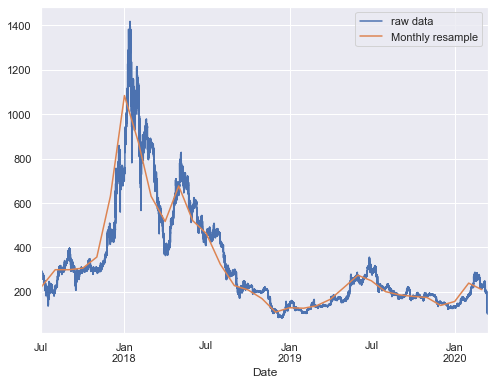

In [44]:
# Plot raw data with monthly resampled data

df.Close.plot(label = 'raw data')
df.resample('M').mean().Close.plot(label = 'Monthly resample')
plt.legend();

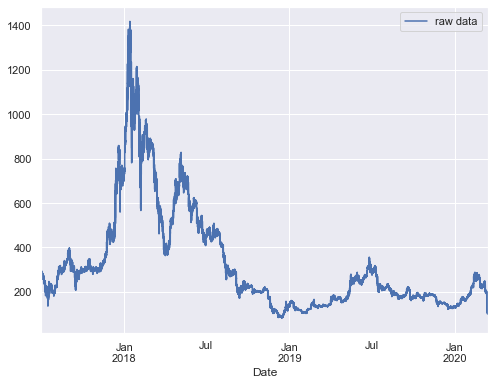

In [45]:
df.Close.plot(label = 'raw data')
#df.resample('M').mean().Close.plot(label = 'Monthly resample')
plt.legend();

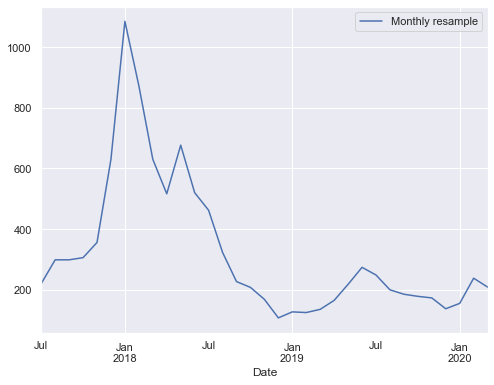

In [46]:
#df.Close.plot(label = 'raw data')
df.resample('M').mean().Close.plot(label = 'Monthly resample')
plt.legend();

### Rolling Averages/Windows

- Rolling average aka. moving averages, are generally used to smooth out short-term fluctuations in time series data and highlight long-term trends

In [47]:
df.head()

,Symbol,Close,Volume,day
Date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday


In [48]:
# What is the rolling average of 4 hours?

df.rolling(window = 4).mean()

,Close,Volume
Date,,
2017-07-01 11:00:00,nan,nan
2017-07-01 12:00:00,nan,nan
2017-07-01 13:00:00,nan,nan
2017-07-01 14:00:00,267.52,1554261.65
2017-07-01 15:00:00,270.44,1759492.56
...,...,...
2020-03-13 16:00:00,118.56,6289262.63
2020-03-13 17:00:00,127.29,4581942.13
2020-03-13 18:00:00,126.79,4873146.86


In [49]:
df.resample('W').mean()

,Close,Volume
Date,,
2017-07-02,268.20,2185035.48
2017-07-09,261.06,1337348.88
2017-07-16,195.70,2986756.02
2017-07-23,212.78,4298593.18
2017-07-30,203.31,1581729.18
...,...,...
2020-02-16,255.20,2329087.25
2020-02-23,265.32,1826094.25
2020-03-01,236.37,2198762.01


In [50]:
# Resampling and rolling average together

df.resample('W').mean().Close.rolling(4).mean()

Date
2017-07-02      nan
2017-07-09      nan
2017-07-16      nan
2017-07-23   234.44
2017-07-30   218.21
              ...  
2020-02-16   201.10
2020-02-23   226.48
2020-03-01   241.13
2020-03-08   246.68
2020-03-15   226.96
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

In [51]:
df.resample('W').mean().Close.rolling(26).mean()

Date
2017-07-02      nan
2017-07-09      nan
2017-07-16      nan
2017-07-23      nan
2017-07-30      nan
              ...  
2020-02-16   172.29
2020-02-23   175.10
2020-03-01   177.40
2020-03-08   179.47
2020-03-15   179.28
Freq: W-SUN, Name: Close, Length: 142, dtype: float64

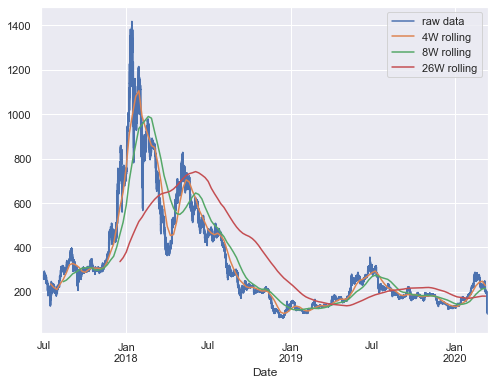

In [52]:
# %matplotlib notebook

df.Close.plot(label = 'raw data' )
df.resample('W').mean().Close.rolling(4).mean().plot(label = '4W rolling')
df.resample('W').mean().Close.rolling(8).mean().plot(label = '8W rolling')
df.resample('W').mean().Close.rolling(26).mean().plot(label = '26W rolling')
plt.legend()

### Lagging and Lead

- Shift: move the data backwards and forwards by a given amount
- diff: find the difference with the previous observation (or a specified further back observation)
- Can be used to computing differences over time

In [53]:

df_daily = df.resample('D').mean()
df_daily

,Close,Volume
Date,,
2017-07-01,265.28,2198771.14
2017-07-02,269.78,2177595.32
2017-07-03,278.88,1459014.73
2017-07-04,276.74,1254579.39
2017-07-05,265.03,1797923.44
...,...,...
2020-03-09,200.82,3804751.53
2020-03-10,201.58,1553063.15
2020-03-11,195.91,1894867.73


In [54]:
df_daily['shift(1)'] = df_daily.Close.shift(1)
df_daily.head(10)

,Close,Volume,shift(1)
Date,,,
2017-07-01,265.28,2198771.14,nan
2017-07-02,269.78,2177595.32,265.28
2017-07-03,278.88,1459014.73,269.78
2017-07-04,276.74,1254579.39,278.88
2017-07-05,265.03,1797923.44,276.74
2017-07-06,266.48,962700.63,265.03
2017-07-07,253.94,1801485.06,266.48
2017-07-08,241.55,1356294.00,253.94
2017-07-09,244.81,729444.92,241.55


In [55]:
df_daily['diff(1)'] = df_daily.Close.diff(1)
df_daily.head(10)

,Close,Volume,shift(1),diff(1)
Date,,,,
2017-07-01,265.28,2198771.14,nan,nan
2017-07-02,269.78,2177595.32,265.28,4.50
2017-07-03,278.88,1459014.73,269.78,9.10
2017-07-04,276.74,1254579.39,278.88,-2.14
2017-07-05,265.03,1797923.44,276.74,-11.72
2017-07-06,266.48,962700.63,265.03,1.45
2017-07-07,253.94,1801485.06,266.48,-12.54
2017-07-08,241.55,1356294.00,253.94,-12.39
2017-07-09,244.81,729444.92,241.55,3.27


Text(0.5, 1.0, '1-Year Rate of return on ETH')

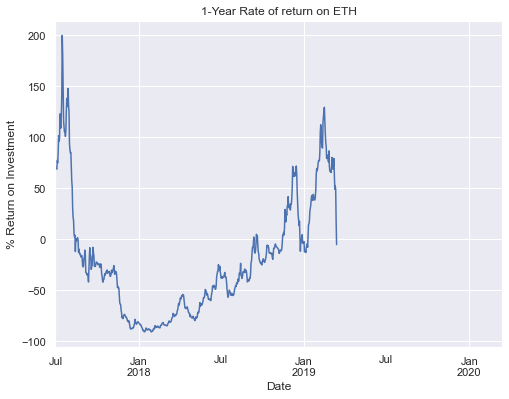

In [56]:
# %matplotlib inline
# Use for shift/diff to calculate 1 year rate of return

((df_daily.Close.shift(-365)/df_daily.Close -1) *100).plot()
plt.ylabel('% Return on Investment')
plt.title('1-Year Rate of return on ETH')

### Time Zone

In [57]:
# datetime with no timezone specified (sometimes called timezone naive datetime object)

t = pd.Timestamp('2020-04-14, 07:50')

In [58]:
#specify timezone

t1 = pd.Timestamp('2020-04-14, 07:50', tz = 'US/Central')
t1

Timestamp('2020-04-14 07:50:00-0500', tz='US/Central')

In [59]:
# What is date and time right now? Take any datetime object and use .now() method

t.now()

Timestamp('2021-04-14 12:15:53.444530')

### Timedelta

In [60]:
# time delta between now (today's date) and t1

(t1.now() - t) 

Timedelta('365 days 04:27:25.115546')

In [61]:
# To convert the above Timedelta object to a number:

(t1.now() - t) // pd.Timedelta('1d')

365

In [62]:
# Can we find time delta between t and t1?

t, t1

(Timestamp('2020-04-14 07:50:00'),
 Timestamp('2020-04-14 07:50:00-0500', tz='US/Central'))

In [63]:
t - t1

TypeError: Timestamp subtraction must have the same timezones or no timezones

### Bonus

In [64]:
# Bonus: How to remove timezone info from a datetime object

t1 = t1.tz_localize(None)
t1

Timestamp('2020-04-14 07:50:00')

In [66]:
# Bonus: What is going on here? daylight savings time


pd.Timestamp('2021-03-14 02:00', tz = 'US/Eastern')

NonExistentTimeError: 2021-03-14 02:00:00